# 1. Fetch Data from YFinance

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.arima_model as smzs
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score
from tabulate import tabulate
from itertools import product
import joblib
from google.colab import files

In [ ]:
start_date = "1999-11-01"
end_date = "2024-01-01"

In [ ]:
# Fetch Meta (Bytedance) data
meta_data = yf.download('META', start=start_date, end=end_date)

# Fetch Tiktok (Bytedance) data
tiktok_data = yf.download('MSFT', start=start_date, end=end_date )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Datetime format to prevent forecast warnings
meta_data.index = pd.to_datetime(meta_data.index)
tiktok_data.index = pd.to_datetime(tiktok_data.index)

In [ ]:
# Meta data
meta_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META,META
Date,,,,,,
2012-05-18 00:00:00+00:00,38.115238,38.230000,45.000000,38.000000,42.049999,573576400
2012-05-21 00:00:00+00:00,33.927845,34.029999,36.660000,33.000000,36.529999,168192700
2012-05-22 00:00:00+00:00,30.906942,31.000000,33.590000,30.940001,32.610001,101786600
2012-05-23 00:00:00+00:00,31.903940,32.000000,32.500000,31.360001,31.370001,73600000
2012-05-24 00:00:00+00:00,32.930851,33.029999,33.209999,31.770000,32.950001,50237200
...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,352.329163,353.390015,357.200012,351.220001,355.579987,11764200
2023-12-26 00:00:00+00:00,353.764832,354.829987,356.980011,353.450012,354.989990,9898600


In [ ]:
meta_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META,META
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2.923000e+03
mean,157.220248,157.693620,159.668765,155.638686,157.619350,3.060472e+07
std,90.652918,90.925863,92.034626,89.773014,90.865561,2.637157e+07
min,17.676777,17.730000,18.270000,17.549999,18.080000,5.467500e+06
25%,80.527534,80.769997,81.470001,80.154999,80.770000,1.633730e+07
50%,153.059174,153.520004,155.589996,151.660004,153.639999,2.294870e+07
75%,204.190208,204.805000,207.645004,201.785004,204.214996,3.520440e+07
max,381.032715,382.179993,384.329987,378.809998,381.679993,5.735764e+08


In [ ]:
# Tiktok data
tiktok_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
1999-11-01 00:00:00+00:00,28.478937,46.187500,47.093750,46.062500,46.625000,53261200
1999-11-02 00:00:00+00:00,28.536741,46.281250,47.250000,45.968750,46.375000,46349000
1999-11-03 00:00:00+00:00,28.363308,46.000000,46.750000,45.750000,46.468750,44517000
1999-11-04 00:00:00+00:00,28.286257,45.875000,46.375000,45.156250,46.156250,54239400
1999-11-05 00:00:00+00:00,28.228432,45.781250,46.437500,45.250000,45.906250,70167400
...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,372.543945,374.579987,375.179993,372.709991,373.679993,17091100
2023-12-26 00:00:00+00:00,372.623505,374.660004,376.940002,373.500000,375.000000,12673100


# 2. Data Visualization

In [ ]:
print(meta_data.columns)
print("-----------------------------------------------")
print(tiktok_data.columns)

MultiIndex([('Adj Close', 'META'),
            (    'Close', 'META'),
            (     'High', 'META'),
            (      'Low', 'META'),
            (     'Open', 'META'),
            (   'Volume', 'META')],
           names=['Price', 'Ticker'])
-----------------------------------------------
MultiIndex([('Adj Close', 'MSFT'),
            (    'Close', 'MSFT'),
            (     'High', 'MSFT'),
            (      'Low', 'MSFT'),
            (     'Open', 'MSFT'),
            (   'Volume', 'MSFT')],
           names=['Price', 'Ticker'])


In [ ]:
# Provide a summary of the statistical properties of the Meta dataset
meta_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META,META
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2.923000e+03
mean,157.220248,157.693620,159.668765,155.638686,157.619350,3.060472e+07
std,90.652918,90.925863,92.034626,89.773014,90.865561,2.637157e+07
min,17.676777,17.730000,18.270000,17.549999,18.080000,5.467500e+06
25%,80.527534,80.769997,81.470001,80.154999,80.770000,1.633730e+07
50%,153.059174,153.520004,155.589996,151.660004,153.639999,2.294870e+07
75%,204.190208,204.805000,207.645004,201.785004,204.214996,3.520440e+07
max,381.032715,382.179993,384.329987,378.809998,381.679993,5.735764e+08


In [ ]:
# Provide a summary of the statistical properties of the Meta dataset
tiktok_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6.080000e+03
mean,71.359731,78.801046,79.599743,77.945906,78.777746,5.130814e+07
std,89.635230,88.636247,89.487549,87.682894,88.603156,3.084410e+07
min,11.243176,15.150000,15.620000,14.870000,15.200000,7.425600e+06
25%,18.947020,27.083749,27.337500,26.830000,27.049999,2.863842e+07
50%,23.784594,32.995001,33.422499,32.590000,33.006407,4.605425e+07
75%,79.152344,85.260002,85.885002,84.574999,85.309998,6.499375e+07
max,380.619812,382.700012,384.299988,378.160004,383.760010,5.910522e+08


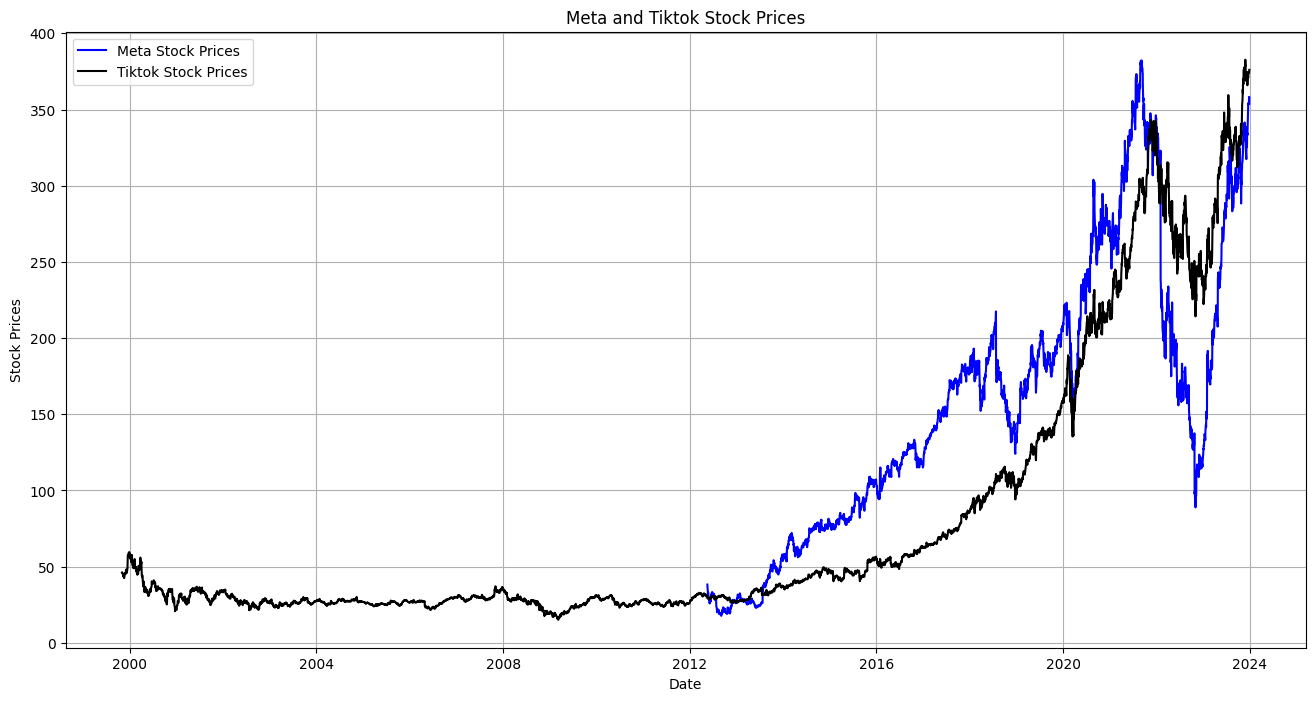

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(meta_data['Close'], label='Meta Stock Prices', color='blue')
plt.plot(tiktok_data['Close'], label='Tiktok Stock Prices', color='black')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.title('Meta and Tiktok Stock Prices')
plt.legend()
plt.show()

# 3. Data Preprocessing

In [ ]:
# For Meta Data

# Check data for Stationarity using the Augmented Dickey Fuller (ADF) Test
def check_stationarity(data):
    adf_result = adfuller(data['Close'])
    return adf_result[1] <= 0.05

# Initializing a counter
differencing_count = 0

# Continuing differencing until the p-value is less than the level of significance
meta_data_diff = meta_data.copy()
while not check_stationarity(meta_data_diff):
    meta_data_diff = meta_data_diff.diff().dropna()
    differencing_count += 1

# Printing the number of differencing iterations
print(f'Number of differencing iterations: {differencing_count}')

# # Transformation for Stability
# meta_data_diff['Close'] = np.log(meta_data_diff['Close'])
# meta_data_diff = meta_data_diff.replace([np.inf, -np.inf], np.nan).dropna()

Number of differencing iterations: 1


In [ ]:
# Initializing a counter
differencing_count = 0

# Continuing differencing until the p-value is less than the level of significance
tiktok_data_diff = tiktok_data.copy()
while not check_stationarity(tiktok_data_diff):
    tiktok_data_diff = tiktok_data_diff.diff().dropna()
    differencing_count += 1

# Printing the number of differencing iterations
print(f'Number of differencing iterations: {differencing_count}')

# # Transformation for Stability
# tiktok_data_diff['Close'] = np.log(tiktok_data_diff['Close'])
# tiktok_data_diff = tiktok_data_diff.replace([np.inf, -np.inf], np.nan).dropna()

Number of differencing iterations: 1


In [ ]:
# #For Meta data
# meta_result = adfuller(meta_data['Close'])
# print(meta_result)
# print(f"ADF Statistic: {meta_result[0]}")
# print(f"p-value: {meta_result[1]}")

In [ ]:
# meta_data.fillna(method='ffill', inplace=True)

In [ ]:
# if meta_result[1] > 0.05:
#   # Drop any NaN or infinite values
#   meta_data = meta_data.replace([np.inf, -np.inf], np.nan).dropna()
#   # Run ADF test
#   meta_result = adfuller(meta_data['Close'])
#   stationarity_interpretation = "Stationary" if meta_result[1] < 0.05 else "Non-Stationary"

# print(f"ADF Statistic after differencing: {meta_result[0]}")
# print(f"p-value after differencing: {meta_result[1]}")
# print(f"Interpretation: The series is {stationarity_interpretation}.")

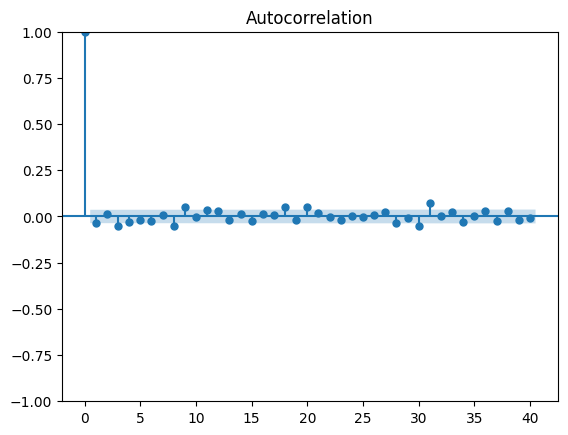

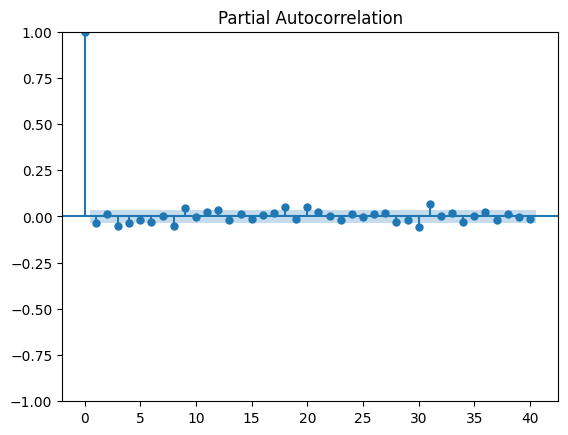

In [ ]:
plot_acf(meta_data_diff["Close"], lags=40)
plot_pacf(meta_data_diff["Close"], lags=40)
plt.show()

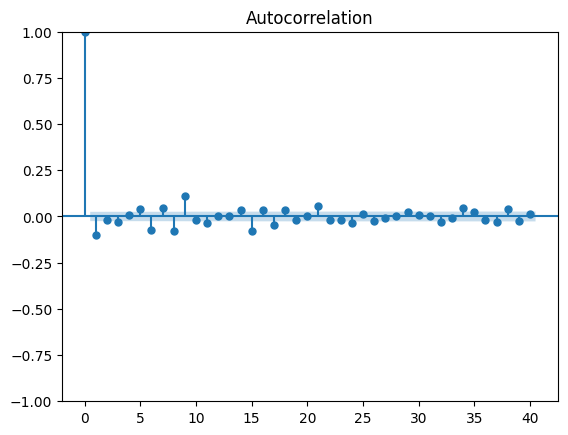

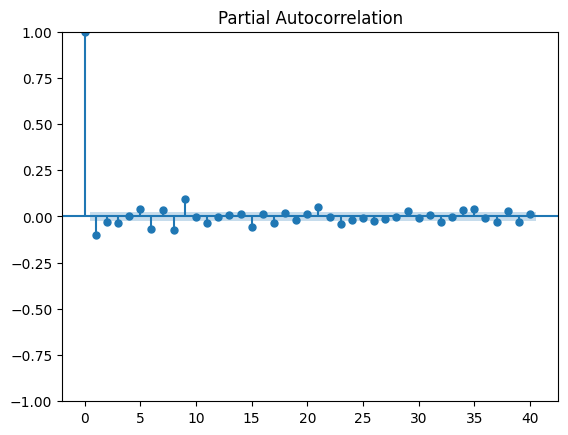

In [ ]:
plot_acf(tiktok_data_diff["Close"], lags=40)
plot_pacf(tiktok_data_diff["Close"], lags=40)
plt.show()

# 4. Training ARIMA model

In [ ]:
meta_train_data, meta_test_data = train_test_split(meta_data['Close'], test_size=0.2, shuffle=False)

In [ ]:
tiktok_train_data, tiktok_test_data = train_test_split(tiktok_data['Close'], test_size=0.2, shuffle=False)

In [ ]:
# # Grid Search for params
# best_score, best_params = float("inf"), None
# for (p, d, q) in product(range(0, 5), range(0, 2), range(0, 5)):
#     try:
#         model = ARIMA(train_data, order=(p, d, q))
#         model_fit = model.fit()
#         if model_fit.aic < best_score:
#             best_score, best_params = model_fit.aic, (p, d, q)
#     except:
#         continue
# print(f'Best parameters found: {best_params}')

In [ ]:
# from pmdarima.arima import auto_arima

# model = auto_arima(train_data, start_p=1, start_q=1,
#                       test='adf',
#                       max_p=5, max_q=5,
#                       m=1,
#                       d=1,
#                       seasonal=False,
#                       start_P=0,
#                       D=None,
#                       trace=True,
#                       error_action='ignore',
#                       suppress_warnings=True,
#                       stepwise=True)

In [ ]:
# import itertools

# # Definimg sets of (p, d, q) values for the ARIMA model
# p_values = range(0, 5)
# d_values = range(0, 5)
# q_values = range(0, 5)

# # Generating all possible combinations of (p, d, q)
# orders = list(itertools.product(p_values, d_values, q_values))

# # Fitting the models to compute the AIC, BIC, MSE
# for order in orders:
#     model = ARIMA(train_data, order=order)
#     model_fit = model.fit()
#     aic = model_fit.aic
#     bic = model_fit.bic

In [ ]:
# For Meta

# Fit the ARIMA model
# Initial ARIMA Model parameters
# best_p, best_d, best_q = [best_params]
meta_model_train = ARIMA(meta_train_data, order=(1, 0, 1))
meta_model_fit_train = meta_model_train.fit()
meta_model_summary = meta_model_fit_train.summary()
print(meta_model_summary)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                   META   No. Observations:                 2338
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6101.902
Date:                Mon, 28 Oct 2024   AIC                          12211.804
Time:                        10:06:21   BIC                          12234.832
Sample:                             0   HQIC                         12220.193
                               - 2338                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.7929    450.647      0.306      0.760    -745.460    1021.046
ar.L1          0.9998      0.001   1114.059      0.000       0.998       1.002
ma.L1         -0.0523      0.012     -4.306      0.0

In [ ]:
# For Tiktok

# Fit the ARIMA model
# Initial ARIMA Model parameters
# best_p, best_d, best_q = [best_params]
tiktok_model_train = ARIMA(tiktok_train_data, order=(1, 0, 1))
tiktok_model_fit_train = tiktok_model_train.fit()
tiktok_model_summary = tiktok_model_fit_train.summary()
print(tiktok_model_summary)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                   MSFT   No. Observations:                 4864
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5536.399
Date:                Mon, 28 Oct 2024   AIC                          11080.799
Time:                        10:06:35   BIC                          11106.757
Sample:                             0   HQIC                         11089.910
                               - 4864                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.3845     39.333      1.688      0.091     -10.707     143.476
ar.L1          0.9998      0.000   3576.863      0.000       0.999       1.000
ma.L1         -0.0784      0.007    -11.276      0.0

In [ ]:
# For Tiktok

# Fit the ARIMA model
# Initial ARIMA Model parameters
# best_p, best_d, best_q = [best_params]
tiktok_model_train = ARIMA(tiktok_train_data, order=(1, 0, 1))
tiktok_model_fit_train = tiktok_model_train.fit()
tiktok_model_summary = tiktok_model_fit_train.summary()
print(tiktok_model_summary)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                   MSFT   No. Observations:                 4864
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5536.399
Date:                Mon, 28 Oct 2024   AIC                          11080.799
Time:                        09:53:35   BIC                          11106.757
Sample:                             0   HQIC                         11089.910
                               - 4864                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.3845     39.333      1.688      0.091     -10.707     143.476
ar.L1          0.9998      0.000   3576.863      0.000       0.999       1.000
ma.L1         -0.0784      0.007    -11.276      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


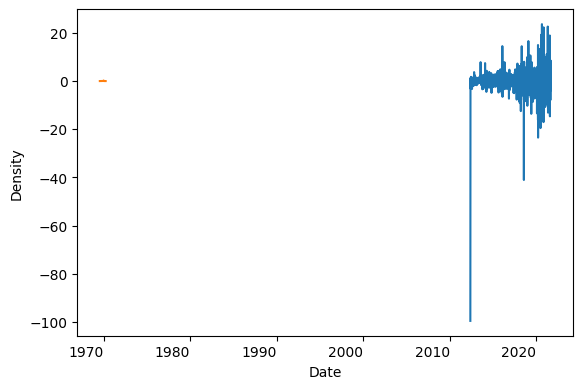

In [ ]:
# plot residual errors
meta_residuals = meta_model_fit_train.resid
meta_residuals.plot()
meta_residuals.plot(kind='kde')
plt.show()

In [ ]:
print(f"AIC: {meta_model_fit_train.aic}")
print(f"BIC: {meta_model_fit_train.bic}")

AIC: 12211.804242038861
BIC: 12234.83244660699


In [ ]:
# For Meta

# Forecast
meta_forecast_results = meta_model_fit_train.get_forecast(steps=len(meta_test_data))
meta_forecast = meta_forecast_results.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# For Tiktok

# Forecast
tiktok_forecast_results = tiktok_model_fit_train.get_forecast(steps=len(tiktok_test_data))
tiktok_forecast = tiktok_forecast_results.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


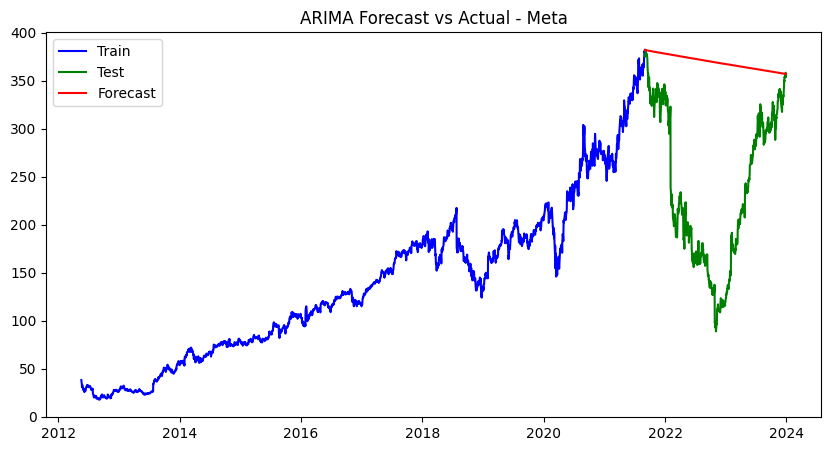

In [ ]:
# Plotting for Meta
train_size = int(len(meta_data)*0.8)
plt.figure(figsize=(10, 5))
plt.plot(meta_data.index[:train_size], meta_train_data, label='Train', color='blue')
plt.plot(meta_data.index[train_size:], meta_test_data, label='Test', color='green')
plt.plot(meta_data.index[train_size:], meta_forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast vs Actual - Meta')
plt.show()

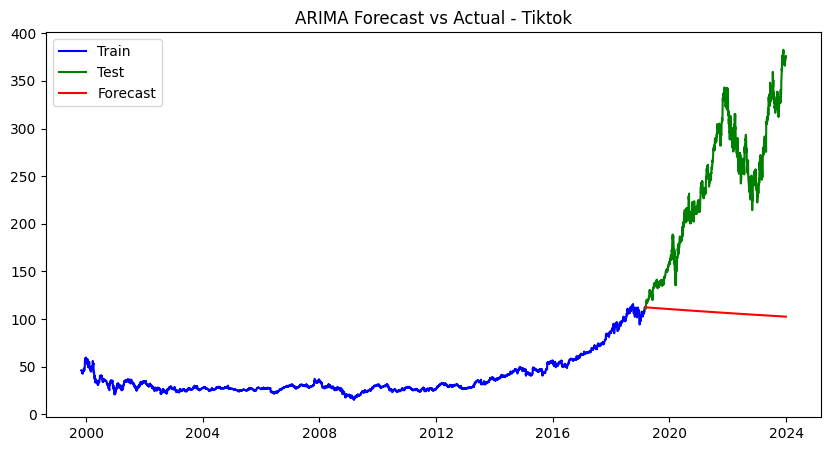

In [ ]:
# Plotting for Tiktok
train_size = int(len(tiktok_data)*0.8)
plt.figure(figsize=(10, 5))
plt.plot(tiktok_data.index[:train_size], tiktok_train_data, label='Train', color='blue')
plt.plot(tiktok_data.index[train_size:], tiktok_test_data, label='Test', color='green')
plt.plot(tiktok_data.index[train_size:], tiktok_forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast vs Actual - Tiktok')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


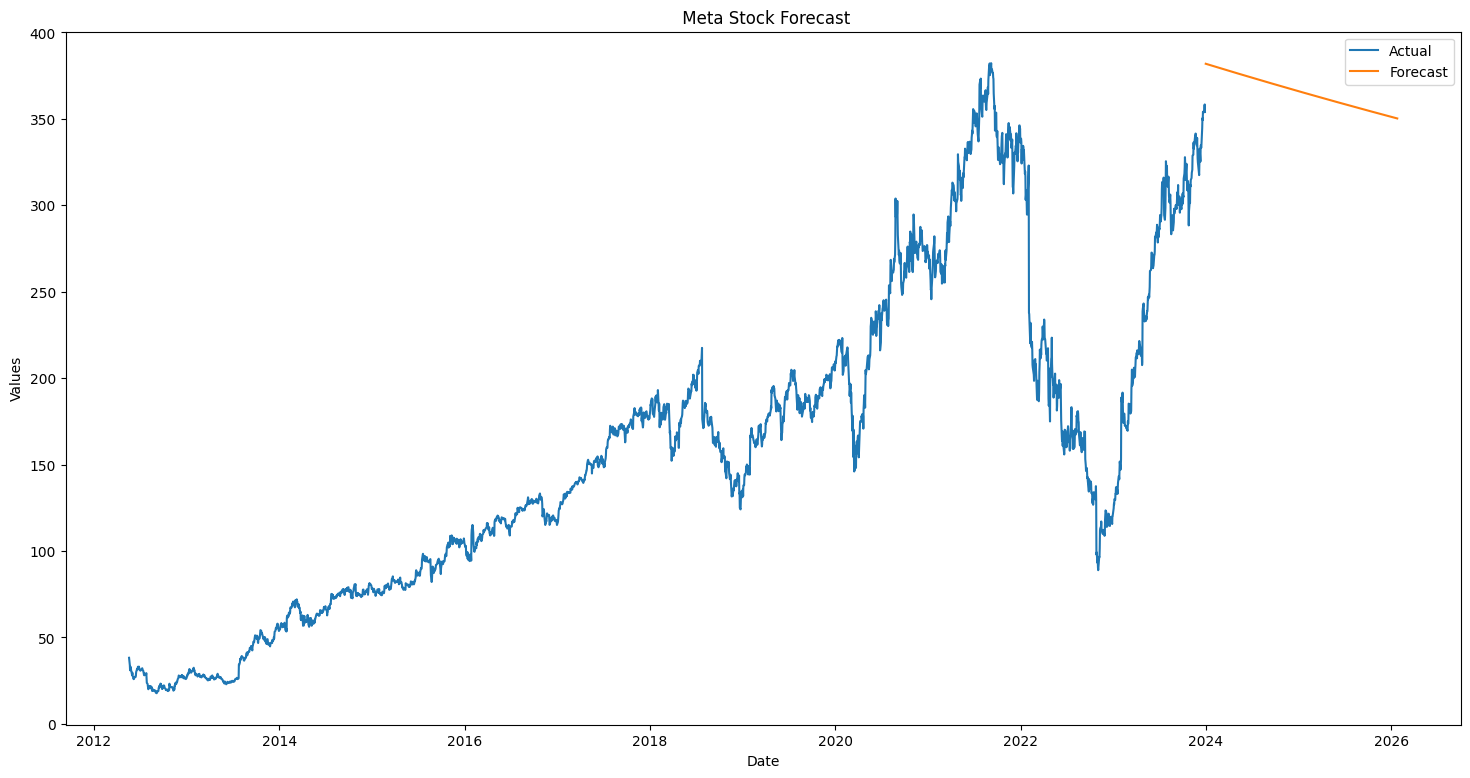

In [ ]:
# Generating forecasts and plot results - Meta
meta_forecast_results = meta_model_fit_train.get_forecast(steps=756)
meta_forecast_mean = meta_forecast_results.predicted_mean
conf_int = meta_forecast_results.conf_int()

# Plotting actual vs. forecast with their confidence intervals
plt.figure(figsize=(18, 9))
plt.plot(meta_data['Close'], label='Actual')
plt.plot(pd.date_range(start='2024-01-01', periods=756, freq='D'), meta_forecast_mean, label='Forecast')
# plt.fill_between(pd.date_range(start='2024-01-01', periods=5, freq='D'), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title(' Meta Stock Forecast')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


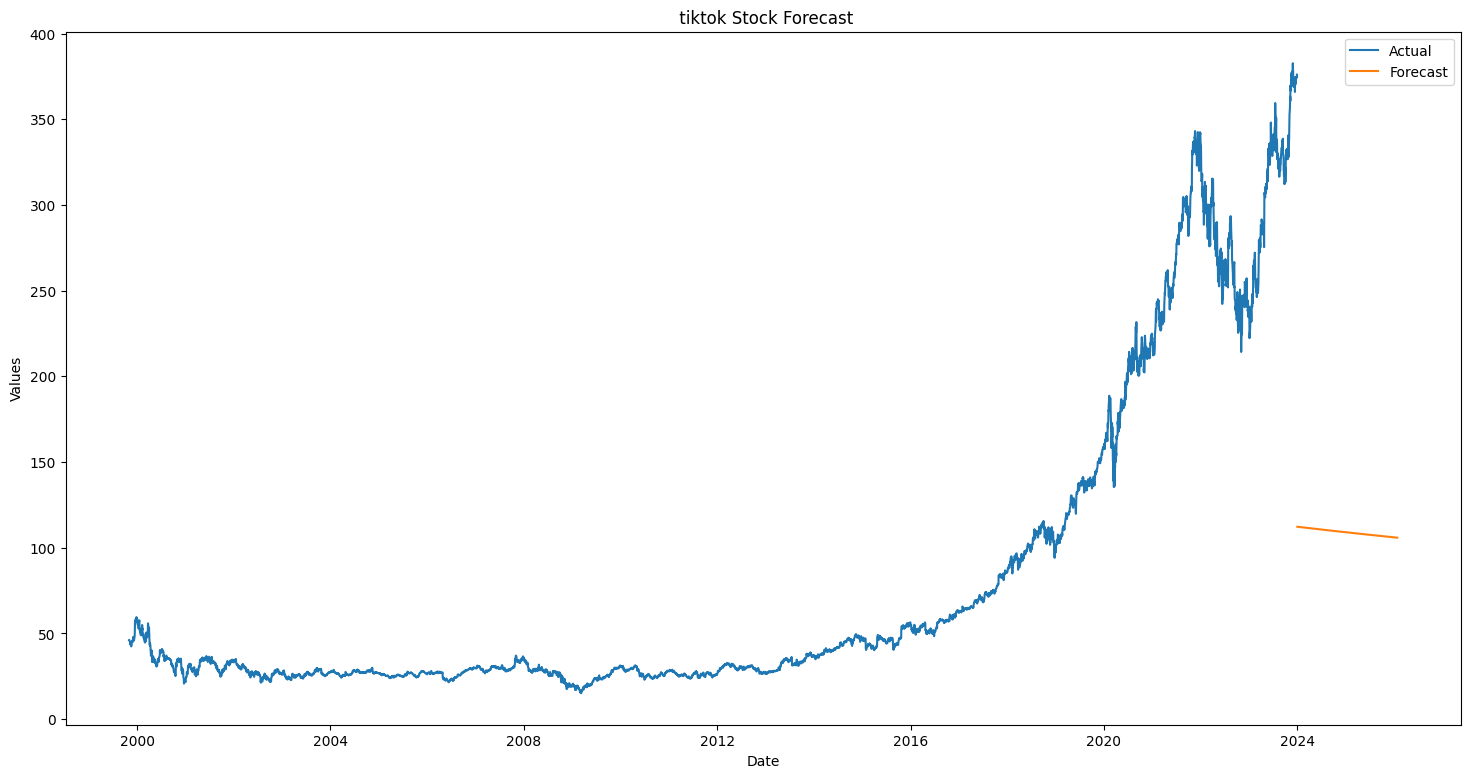

In [ ]:
# Generating forecasts and plot results - Tiktok
tiktok_forecast_results = tiktok_model_fit_train.get_forecast(steps=756)
tiktok_forecast_mean = tiktok_forecast_results.predicted_mean
conf_int = tiktok_forecast_results.conf_int()

# Plotting actual vs. forecast with their confidence intervals
plt.figure(figsize=(18, 9))
plt.plot(tiktok_data['Close'], label='Actual')
plt.plot(pd.date_range(start='2024-01-01', periods=756, freq='D'), tiktok_forecast_mean, label='Forecast')
# plt.fill_between(pd.date_range(start='2024-01-01', periods=5, freq='D'), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title(' tiktok Stock Forecast')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

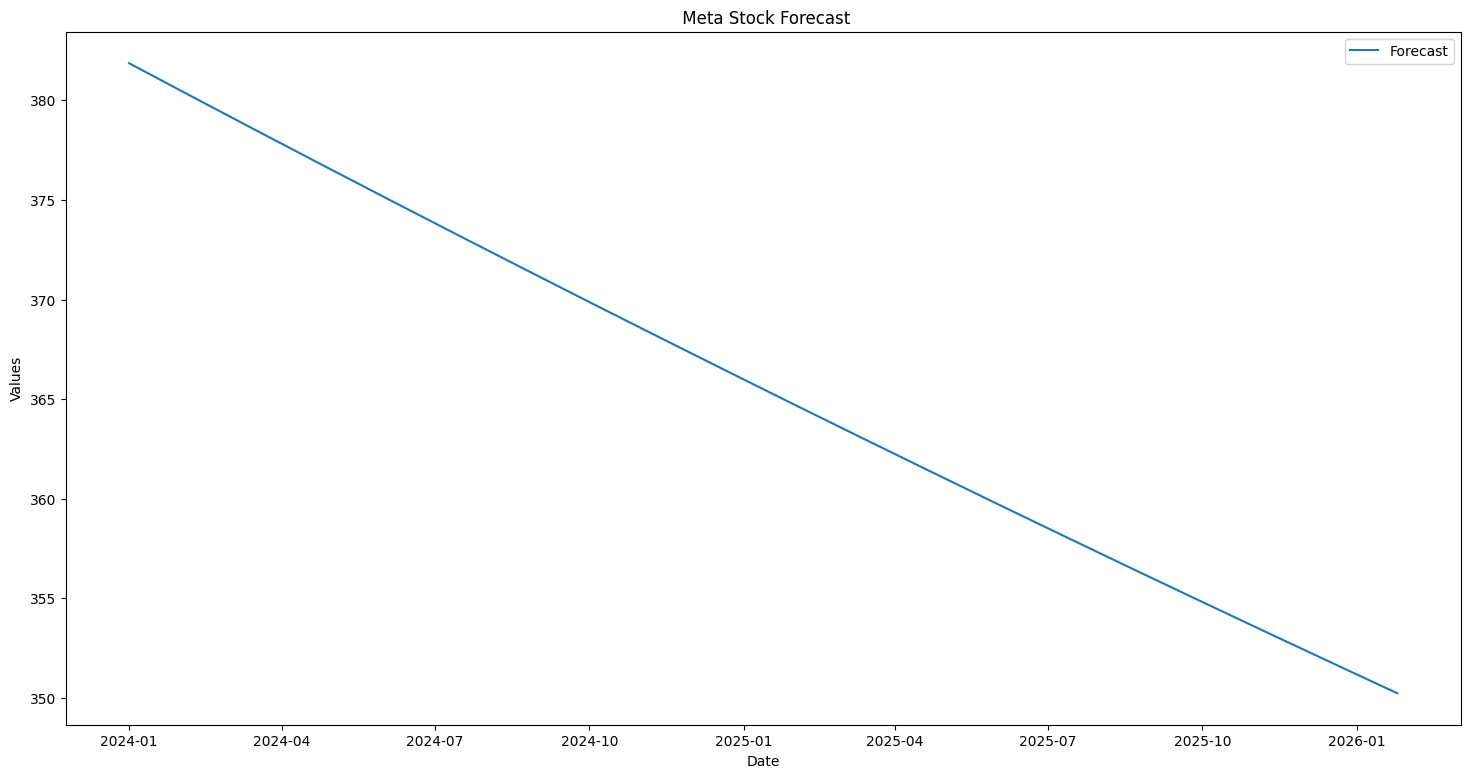

In [ ]:
# Plotting actual vs. forecast with their confidence intervals
plt.figure(figsize=(18, 9))
plt.plot(pd.date_range(start='2024-01-01', periods=756, freq='D'), forecast_mean, label='Forecast')
# plt.fill_between(pd.date_range(start='2024-01-01', periods=5, freq='D'), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title(' Meta Stock Forecast')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
joblib.dump(meta_model_train, 'arima_META.pkl')
files.download('arima_META.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
joblib.dump(tiktok_model_train, 'arima_MSFT.pkl')
files.download('arima_MSFT.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5. Model Evaluation

In [ ]:
# Training set
train_forecast = model_fit_train.get_forecast(steps=len(train_data)).predicted_mean
train_mae = mean_absolute_error(train_data, train_forecast)
train_mse = mean_squared_error(train_data, train_forecast)
train_rmse = np.sqrt(train_mse)

# Test set
test_forecast = forecast
test_mae = mean_absolute_error(test_data, test_forecast)
test_mse = mean_squared_error(test_data, test_forecast)
test_rmse = np.sqrt(test_mse)

metrics_table = [
    ["Metric", "Training Set", "Testing Set"],
    ["Mean Absolute Error (MAE)", f"{train_mae:.2f}", f"{test_mae:.2f}"],
    ["Mean Squared Error (MSE)", f"{train_mse:.2f}", f"{test_mse:.2f}"],
    ["Root Mean Squared Error (RMSE)", f"{train_rmse:.2f}", f"{test_rmse:.2f}"]
]

In [ ]:
# F1 (diff type of eva)

train_directions = np.sign(train_data.diff().dropna())
train_forecast_directions = np.sign(train_forecast.diff().dropna())
train_f1 = f1_score(train_directions, train_forecast_directions, average='weighted')

test_directions = np.sign(test_data.diff().dropna())
test_forecast_directions = np.sign(test_forecast.diff().dropna())
test_f1 = f1_score(test_directions, test_forecast_directions, average='weighted')

metrics_table.append(["F1 Score", f"{train_f1:.2f}", f"{test_f1:.2f}"])

print(tabulate(metrics_table, headers="firstrow", tablefmt="fancy_grid"))

# Prediction Visualization